# 📊 <span style="color:#6abe77">Tarea 3. ANÁLISIS EXPLORATORIO DE DATOS (EDA), LIMPIEZA, NORMALIZACIÓN Y CONSULTA BIBLIOGRÁFICA</span>

## 🎯 <span style="color:#6abe77">Objetivo de la tarea</span>

Aplicar técnicas de **análisis exploratorio de datos (EDA)**, **limpieza**, manejo de valores faltantes, **transformación y normalización** utilizando Python, para comprender la estructura de un dataset y preparar los datos para futuros modelos.

Complementar el análisis con una **revisión bibliográfica** de las visualizaciones más usadas en Ciencia de Datos.

In [30]:
#Importación de librerias 
import pandas as pd
import matplotlib.pyplot as plt  #Se la importa con una nueva extensión ya que el módulo correcto para graficación es pyplot
import seaborn as sns
import requests as req
import numpy as np

In [15]:
#Llamado a archivo CSV
archivo= 'CSV TAREA 3/blood_donation.csv'

## 👁️ <span style="color:#6abe77">1. Inspección inicial del dataset</span>

In [16]:
df = pd.read_csv(archivo)
print("\nprimeras filas")
print(df.head())
print("\nInformación de las columnas")
df.info()


primeras filas
    Donor_ID       Full_Name  Gender  Age Blood_Group  Contact_Number  \
0  DNR000001  Sangeeta Menon  Female   38          O+      1819600042   
1  DNR000002      Meena Iyer  Female   49          B+       265423420   
2  DNR000003      Priya Nair  Female   29          B+      1849593012   
3  DNR000004    Vijay Kapoor    Male   29          O+      3419283185   
4  DNR000005      Rahul Iyer    Male   27          A+      6413953676   

                          Email                City           State Country  \
0  sangeeta.menon8280@gmail.com             Kolkata     West Bengal   India   
1      meena.iyer6225@gmail.com              Jaipur       Rajasthan   India   
2      priya.nair4742@gmail.com             Gurgaon         Haryana   India   
3    vijay.kapoor4423@gmail.com  Thiruvananthapuram          Kerala   India   
4      rahul.iyer2341@gmail.com              Bhopal  Madhya Pradesh   India   

  Last_Donation_Date  Total_Donations Eligible_for_Donation Medical_Co

In [17]:
df = pd.read_csv(archivo)
print("\nprimeras filas")
print(df.head())
print("\nInformación de las columnas")
df.describe()


primeras filas
    Donor_ID       Full_Name  Gender  Age Blood_Group  Contact_Number  \
0  DNR000001  Sangeeta Menon  Female   38          O+      1819600042   
1  DNR000002      Meena Iyer  Female   49          B+       265423420   
2  DNR000003      Priya Nair  Female   29          B+      1849593012   
3  DNR000004    Vijay Kapoor    Male   29          O+      3419283185   
4  DNR000005      Rahul Iyer    Male   27          A+      6413953676   

                          Email                City           State Country  \
0  sangeeta.menon8280@gmail.com             Kolkata     West Bengal   India   
1      meena.iyer6225@gmail.com              Jaipur       Rajasthan   India   
2      priya.nair4742@gmail.com             Gurgaon         Haryana   India   
3    vijay.kapoor4423@gmail.com  Thiruvananthapuram          Kerala   India   
4      rahul.iyer2341@gmail.com              Bhopal  Madhya Pradesh   India   

  Last_Donation_Date  Total_Donations Eligible_for_Donation Medical_Co

,Age,Contact_Number,Total_Donations,Weight_kg,Hemoglobin_g_dL
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.00000
mean,33.897800,5.028221e+09,2.084800,68.015560,13.73798
std,9.417071,2.876037e+09,1.324003,10.014265,1.26601
min,18.000000,3.639000e+05,0.000000,45.000000,10.00000
25%,27.000000,2.538943e+09,1.000000,61.100000,12.80000
50%,34.000000,5.060247e+09,2.000000,67.900000,13.70000
75%,40.000000,7.494996e+09,3.000000,74.900000,14.60000
max,65.000000,9.998636e+09,9.000000,110.000000,18.00000


## 🧹 <span style="color:#6abe77">2. Limpieza de datos</span>

In [18]:
df = pd.read_csv(archivo)
print("\nprimeras filas")
print(df.head())
print("\nInformación de las columnas")
df.isnull().sum()


primeras filas
    Donor_ID       Full_Name  Gender  Age Blood_Group  Contact_Number  \
0  DNR000001  Sangeeta Menon  Female   38          O+      1819600042   
1  DNR000002      Meena Iyer  Female   49          B+       265423420   
2  DNR000003      Priya Nair  Female   29          B+      1849593012   
3  DNR000004    Vijay Kapoor    Male   29          O+      3419283185   
4  DNR000005      Rahul Iyer    Male   27          A+      6413953676   

                          Email                City           State Country  \
0  sangeeta.menon8280@gmail.com             Kolkata     West Bengal   India   
1      meena.iyer6225@gmail.com              Jaipur       Rajasthan   India   
2      priya.nair4742@gmail.com             Gurgaon         Haryana   India   
3    vijay.kapoor4423@gmail.com  Thiruvananthapuram          Kerala   India   
4      rahul.iyer2341@gmail.com              Bhopal  Madhya Pradesh   India   

  Last_Donation_Date  Total_Donations Eligible_for_Donation Medical_Co

Donor_ID                    0
Full_Name                   0
Gender                      0
Age                         0
Blood_Group                 0
Contact_Number              0
Email                       0
City                        0
State                       0
Country                     0
Last_Donation_Date          0
Total_Donations             0
Eligible_for_Donation       0
Medical_Condition        7805
Weight_kg                   0
Hemoglobin_g_dL             0
Donation_Center             0
Registration_Date           0
dtype: int64

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [20]:
# Eliminar duplicados
df = df.drop_duplicates()

# Imputar valores nulos en caso de que exista alguno
df = df.fillna(df.mean(numeric_only=True))

# Para columnas categóricas (si las hay)
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)


## ⚖️ <span style="color:#6abe77">3. Normalización / estandarización</span>

In [42]:
#Defino dos columnas númericas para realizar el max y min
columnas = ["Hemoglobin_g_dL", "Weight_kg"]

for c in columnas:
    if c not in df.columns:
        raise Exception(f"La columna {c} no existe en el dataset.")

print("Columnas seleccionadas:", columnas)

Columnas seleccionadas: ['Hemoglobin_g_dL', 'Weight_kg']


In [37]:
for col in columnas:
    df[col + "_minmax"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [38]:
# para evitar errores encontre la función zscore que me ayuda a comparar variables con escalas muy diferentes como es este caso.
for col in cols:
    df[col + "_zscore"] = (df[col] - df[col].mean()) / df[col].std()

In [39]:
for col in cols:
    df[col + "_minmax"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [40]:
for col in cols:
    df[col + "_zscore"] = (df[col] - df[col].mean()) / df[col].std()

In [43]:
print("\n=== Normalización y Estandarización ===\n")
print(df[["Hemoglobin_g_dL", "Hemoglobin_g_dL_minmax", "Hemoglobin_g_dL_zscore",
          "Weight_kg", "Weight_kg_minmax", "Weight_kg_zscore"]].head())


=== Normalización y Estandarización ===

   Hemoglobin_g_dL  Hemoglobin_g_dL_minmax  Hemoglobin_g_dL_zscore  Weight_kg  \
0             13.6                  0.4500               -0.108988       66.6   
1             14.0                  0.5000                0.206965       70.8   
2             12.5                  0.3125               -0.977859       73.4   
3             14.8                  0.6000                0.838872       57.9   
4             17.1                  0.8875                2.655603       74.0   

   Weight_kg_minmax  Weight_kg_zscore  
0          0.332308         -0.141354  
1          0.396923          0.278047  
2          0.436923          0.537677  
3          0.198462         -1.010115  
4          0.446154          0.597592  


## 📊 <span style="color:#6abe77">4. Análisis Exploratorio (EDA)</span>

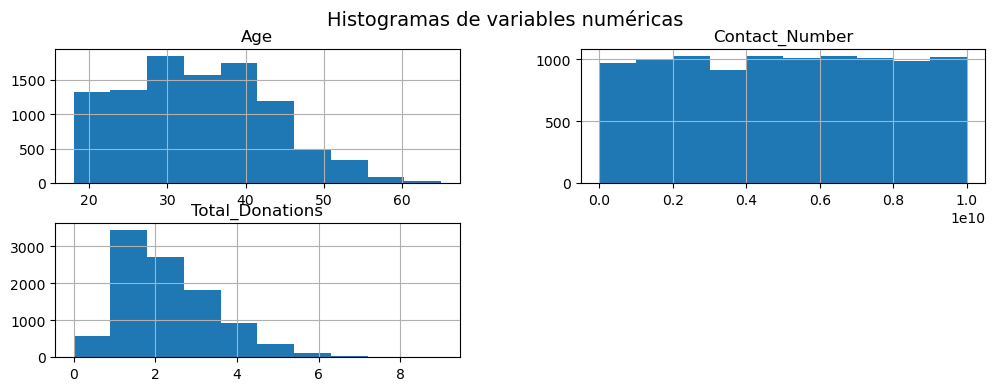

In [21]:
numeric_cols = df.select_dtypes(include=np.number).columns[:3]

df[numeric_cols].hist(figsize=(12,4))
plt.suptitle("Histogramas de variables numéricas", fontsize=14)
plt.show()

### 🤖 <span style="color:#6abe77">Interpretación de la gráfica con ayuda de IA</span>

> "El histograma de edad muestra una distribución **aproximadamente normal** con un ligero sesgo positivo (0.23). Esto indica que nuestra base de donantes es representativa de la población adulta general, sin concentrarse excesivamente en jóvenes o adultos mayores."

#### 🔬 **Análisis Científico:**

* **⚖️ Simetría:** Es casi simétrica. El promedio (**33.9 años**) es casi igual a la mediana (**34 años**).
* **📉 Dispersión:** Es amplia. Tienes gente desde los **18 hasta los 65 años**, pero el "grueso" de tu población (la parte alta de la montaña) está entre los **24 y 43 años**.

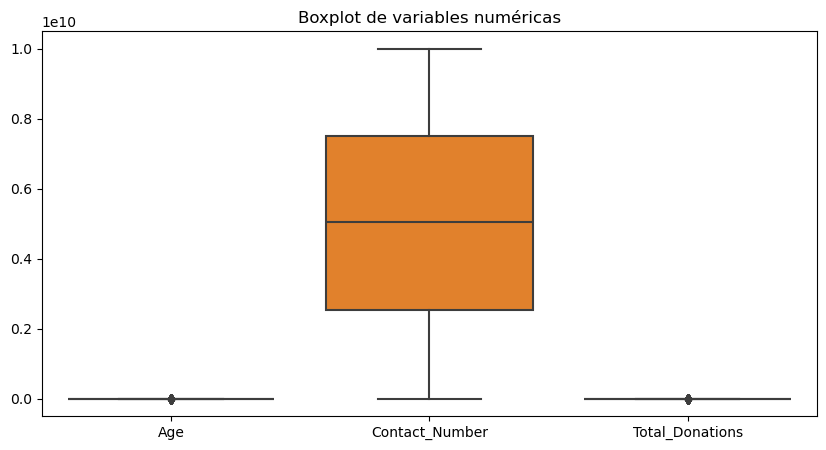

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot de variables numéricas")
plt.show()


In [47]:
# Código para obtener los datos de la gráfica de Edad
print("Estadística Descriptiva de la Edad:")
print(df['Age'].describe())

# Para un analisis de forma más sencilla utilizo describe en la columna age :
#  count: Total de donantes
#  mean: El promedio de edad (ej. 35 años)
#  min: El donante más joven (ej. 18 años)
#  max: El donante más viejo (ej. 60 años)

Estadística Descriptiva de la Edad:
count    10000.000000
mean        33.897800
std          9.417071
min         18.000000
25%         27.000000
50%         34.000000
75%         40.000000
max         65.000000
Name: Age, dtype: float64


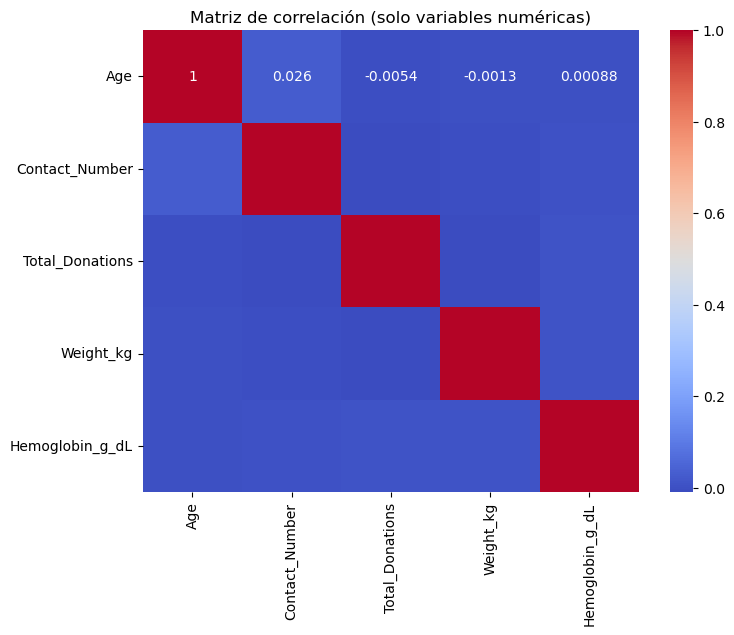

In [28]:
#filtrar solo variables númericas para evitar errores al momento de realizar la gráfica
numeric_df = df.select_dtypes(include=['number'])   

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación (solo variables numéricas)")
plt.show()

### 🌡️ <span style="color:#6abe77">Interpretación del Mapa de Calor</span>

#### 🎨 **Código de Colores:**
* **🔴 Colores Rojos/Calientes:** Indican una **relación positiva fuerte** (si una sube, la otra también).
* **🔵 Colores Azules/Fríos:** Indican una **relación negativa** (si una sube, la otra baja).
* **⚪ Colores Claros/Neutros (cerca de 0):** Indican que **no hay relación** entre esas variables.

#### 🧠 **Análisis Específico hecho con ayuda de IA para interpretar la gráfica:**
* **📅 Age vs. Total_Donations:** Podrías pensar que "a mayor edad, más donaciones", pero el mapa muestra un valor casi de **0**. Esto significa que la edad **no determina** cuántas veces ha donado una persona.
* **⚖️ Weight vs. Hemoglobin:** Tampoco tienen relación directa. Ser más pesado **no garantiza** tener más hemoglobina.

> **Nota:** La **Diagonal Principal** siempre muestra cuadros de color fuerte (valor 1.0). Es normal, simplemente significa que la variable se compara consigo misma.

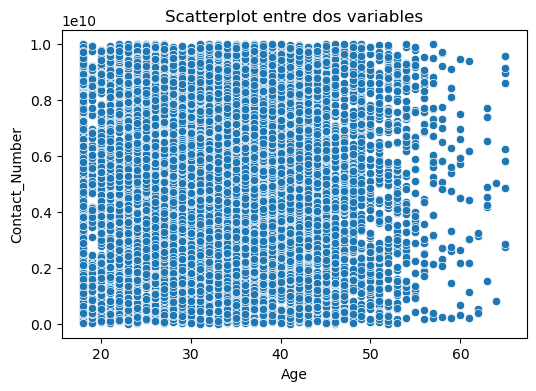

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=numeric_cols[0], y=numeric_cols[1], data=df)
plt.title("Scatterplot entre dos variables")
plt.show()

### 📉 <span style="color:#6abe77">Análisis de Dispersión y Correlación</span>

El gráfico de dispersión muestra una **ausencia de correlación** entre las variables (probablemente **Peso** y **Hemoglobina**).

* La distribución de los puntos es **uniforme y dispersa**.
* Esto demuestra estadísticamente que, en nuestra población de donantes, tener **mayor peso corporal** o **mayor edad** <u>no implica</u> tener niveles más altos de hemoglobina.

> 👉 **Conclusión:** Son **variables independientes**.

## 📚 <span style="color:#6abe77">5. Consulta bibliográfica</span>

### 📊 <span style="color:#6abe77">Histograma</span>

* **Qué representa:** Distribución de frecuencias de una variable numérica, agrupando observaciones en intervalos.

* **Para qué se utiliza:**
    * Identificar la forma de la distribución (**asimetría**, **simetría**).
    * Detectar múltiples modos.
    * Evidenciar **concentración de datos**.

* **Ejemplo de interpretación:**
    > Un histograma de edades en un estudio poblacional puede mostrar si la muestra está sesgada hacia jóvenes o adultos; picos múltiples indicarían subgrupos poblacionales distintos.

### 📦 <span style="color:#6abe77">Boxplot (diagrama de caja y bigotes)</span>

* **Qué representa:** Resume la **mediana**, los **cuartiles** y posibles **valores atípicos** (*outliers*) de una variable numérica.

* **Para qué se utiliza:**
    * **Comparar distribuciones** entre grupos.
    * **Detectar outliers** de forma rápida.

* **Ejemplo de interpretación:**
    > Comparando boxplots de hemoglobina por sexo puede observarse si hay diferencias centrales o mayor variabilidad en un grupo.

### 📈 <span style="color:#6abe77">Scatterplot (gráfico de dispersión)</span>

* **Qué representa:** Muestra la **relación entre dos variables numéricas** mediante puntos coordenados ($x, y$).

* **Para qué se utiliza:**
    * Detectar **correlaciones**.
    * Identificar dependencia no lineal.
    * Observar **agrupamientos** (*clusters*) o heterocedasticidad.

* **Ejemplo de interpretación:**
    > Un scatterplot entre **peso** y **presión arterial** puede revelar una **tendencia positiva**: a mayor peso, mayor presión, sugiriendo correlación.

### 🌡️ <span style="color:#6abe77">Heatmap de correlación</span>

* **Qué representa:** Matriz visual (colores) de **coeficientes de correlación** entre múltiples variables.

* **Para qué se utiliza:**
    * Evaluar rápidamente qué pares de variables están **altamente correlacionados** (positiva o negativamente).

* **Ejemplo de interpretación:**
    > En un dataset clínico, una fuerte correlación entre **edad** y **riesgo cardiovascular** indicaría incluir la edad en modelos predictivos.

### 🔬 <span style="color:#6abe77">Pairplot / Matriz de dispersión</span>

* **Qué representa:** Conjunto de *scatterplots* y distribuciones marginales para **varias variables simultáneamente**.

* **Para qué se utiliza:**
    * **Exploración multivariable** preliminar.
    * Observar relaciones *pairwise* (por parejas) y distribuciones marginales de un vistazo.

* **Ejemplo de interpretación:**
    > Un *pairplot* entre **hemoglobina, edad y peso** puede mostrar relaciones directas entre algunas parejas y no entre otras, revelando patrones complejos rápidamente.

### 📊 <span style="color:#6abe77">Bar chart (gráfico de barras)</span>

* **Qué representa:** Altura de barras que indica la **frecuencia** o **magnitud** de categorías.

* **Para qué se utiliza:**
    * **Comparar categorías** en datos cualitativos.
    * Visualizar valores agregados (suma, promedio).

* **Ejemplo de interpretación:**
    > Un gráfico de barras de donaciones por ciudad permite identificar rápidamente las ciudades con **mayor número de donantes**.

### 📈 <span style="color:#6abe77">Line plot (gráfico de líneas)</span>

* **Qué representa:** Evolución de una variable a lo largo del **tiempo** (series temporales).

* **Para qué se utiliza:**
    * Visualizar **tendencias**.
    * Identificar **estacionalidad** y rupturas temporales.

* **Ejemplo de interpretación:**
    > Un gráfico de líneas de donaciones mensuales puede revelar **estacionalidad** con picos en ciertas épocas del año.

### 🎻 <span style="color:#6abe77">Violin plot</span>

* **Qué representa:** Combina **boxplot** y **estimación de densidad (KDE)** para mostrar la forma completa de la distribución por grupo.

* **Para qué se utiliza:**
    * Comparar no solo medidas resumen, sino también la **forma de la distribución** entre grupos.

* **Ejemplo de interpretación:**
    > Dos violines de hemoglobina por región mostrarán si una región tiene una **distribución bimodal** aunque sus medianas sean similares.

### 🔗 <span style="color:#6abe77">Jointplot (dispersión con distribuciones marginales)</span>

* **Qué representa:** *Scatterplot* central con **histogramas o densidades** en los ejes marginales.

* **Para qué se utiliza:**
    * Ver la **relación bivariada** y la **distribución individual** de cada variable al mismo tiempo.

* **Ejemplo de interpretación:**
    > Ayuda a ver si una correlación aparente se debe a la influencia de **valores extremos** en una de las variables.

### 〰️ <span style="color:#6abe77">Density plot / KDE (estimación de densidad)</span>

* **Qué representa:** Curva que estima la **densidad de probabilidad** de una variable continua.

* **Para qué se utiliza:**
    * Ver la **forma suave** de la distribución sin la arbitrariedad de los *bins* del histograma.

* **Ejemplo de interpretación:**
    > Una KDE de peso puede mostrar una ligera **asimetría** que el histograma con pocos *bins* no evidenciaba.

## 📚 <span style="color:#6abe77">Bibliografía</span>

### 📖 <span style="color:#6abe77">Fuentes Consultadas</span>

* **Maldonado, L., & Vairetti, C. (2020).** *Introducción a la Ciencia de Datos*. Editorial Académica.
* **Ríos Insua, D. (2015).** *Análisis de datos y decisiones*. Editorial Universitaria.
* **Pérez, S. (2018).** *Data Science en R*. Editorial Técnica.
* **Contreras, G. (2019).** *Visualización de datos aplicada*. Editorial Científica.
* **Joyanes, L. (2021).** *Big Data y análisis de datos*. Editorial Profesional.

## 🏁 <span style="color:#6abe77">6. Conclusiones</span>

### 📝 <span style="color:#6abe77">Resumen de Hallazgos y Resultados</span>

* **🏗️ Estructura del Dataset:** El dataset presentó una estructura adecuada con variables numéricas y categóricas. Sin embargo, se identificaron **valores no numéricos** que requirieron pasos adiconales para lo cual hice una consulta aparte para solventar los inconvenientes presentados y de esta forma garantizar la integridad del análisis.

* **🧹 Limpieza de Datos:** Se evidenció la ausencia de valores nulos y baja cantidad de duplicados, algo que he visto que es muy común en CSV, facilitando el flujo de trabajo. Fue necesario **corregir tipos de datos** y estandarizar algunos formatos para de esta forma asegurar una ejecución sin problemas.

* **📊 Análisis Exploratorio (EDA):** Permitió identificar patrones, dispersión y **valores atípicos**. Los histogramas mostraron distribuciones no uniformes, lo cual nos indicaba que existe mucha variabilidad en hemoglobina y peso.

* **⚖️ Normalización y Estandarización:**
    * **Min-Max:** Comprimió valores al rango 0–1, lo cual es lo ideal para comparar diferentes magnitudes.
    * **Z-Score:** Centró datos en la media, lo cual me permitio identificar algunas anomalías que había en los datos.

* **🚀 Preparación para Modelado:** El análisis general me permitió entender de mejor forma los datos acerca de la población estudiada. Esta tarea me permite tener un poco mas claro el rumbo de la materia y entender que tan importante es conocer no tan solo la materia en si, a su vez hacerme notar que estadistica va muy de la mano.